<a href="https://colab.research.google.com/github/Cesar85Hol/DNLP-project/blob/main/CASY_DNLP_project_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASY DNLP PROJECT** - BERTopic for insights in diagnosis
---
**CANDIDATE** SEMINARIO YRIGOYEN CESAR AUGUSTO

**COURSE** Deep Natural Language Processing

**University** Politecnico di Torino - Italy


## Main idea

Analyse the wiki_medical_terms dataset in order to fine-tune a pretrained model with medical data. Dataset contains medical terms and their wikipedia text.

The objective of this proposal is to generate e Lnaguage model able to suggest in phase of diagnosis, further ideas for doctors, based on description similarity. Since it's very important to understand why the model chosen some terms **BertTopic** is used to rank the top5 highest medical terms.  a NER model could be added to highlight the similarity terms in the description

**Dataset** can be downloaded fro hugginface at the link: [Wiki Medical Terms](https://huggingface.co/datasets/gamino/wiki_medical_terms)

 ## <span style="font-family:Verdana; color:red">  0. TO DO

<span style="font-family:Verdana; color:red">

- Togliere stopwords: symptomps, sign --> riprovare
- Classificare tutte le malattie con gruppi simili a quelli trovati da bertopic
- usare la classificazione per capire se i documenti classificati in certi gruppi vi appartengono
- provare con LSI come altri metodi
***

##Installing dependencies


In [1]:
%%capture
!pip install bertopic
!pip install datasets
!pip install openai

In [2]:
!pip install gensim==4.2.0
!pip install nltk
!pip install pandas
!pip install spacy
!pip install scikit-learn==1.1.0
!pip install scikit-optimize>=0.8.1
!pip install matplotlib
!pip install torch
!pip install numpy==1.23.0
!pip install libsvm
!pip install flask
!pip install sentence_transformers
!pip install requests
!pip install tomotopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 57.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
E

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp310-cp310-linux_x86_64.whl size=251406 sha256=0802aafda06f760a37c59210d7ba1b7e8c0206c4445c433d21e062004aec35fb
  Stored in directory: /root/.cache/pip/wheels/79/c7/19/a8c85928f8e629654b8e1adb3c8091f0bb77344d0ee9954a85
Successfully built libsvm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 33.4 MB/s eta 0:00:00


In [8]:
!pip install octis

## 1. Exploring the dataset

### Full dataset - for topic quality

In [9]:
from datasets import load_dataset
import tqdm as notebook_tqdm

dataset = load_dataset("gamino/wiki_medical_terms")
terms_number= len(dataset['train'])
print(f"N° wiki terms: {terms_number}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


N° wiki terms: 6861


In [10]:
import pandas as pd
i=595

item_ex=dataset['train']['page_title'][i]
text_ex=dataset['train']['page_text'][i]
print(f"wiki_term: {item_ex}")
print(f"text: {text_ex}")

'''
there are more items per page: --> space for creating different sections in the document: enrich the dictionary
- Description (no label but first paragraph,maybe 2 \n to split)
- Signs and symptoms
- Cause
- Risk factors
- Pathophysiology
- Diagnosis
- Detection in body fluids
- Prevention
- Limitation of availability
- References
# md_terms=list(dataset['train']['page_title'])
# md_wiki=[item.split('\n')[0] for item in dataset['train']['page_text']]
# data_dict={}
# for i in range(len(md_terms)):
#     data_dict['idx']=i
#     data_dict['md_term']=md_terms[i]
# #     data_dict['md_fulltext']=md_wiki[i]
# print(len(md_terms))
# print(len(md_wiki))
#df=pd.DataFrame([dataset['train']['page_title'],dataset['train']['page_text']], columns=['disease','description'])
'''
#no test/val data since these are all documents no classified --
#will be interesting to know the clusters built by BERTopic



wiki_term: Breast cyst
text: A breast cyst is a fluid-filled sac within the breast. One breast can have one or more breast cysts. They are often described as round or oval lumps with distinct edges. In texture, a breast cyst usually feels like a soft grape or a water-filled balloon, but sometimes a breast cyst feels firm.Breast cysts can be painful and may be worrisome but are generally benign. They are most common in pre-menopausal women in their 30s or 40s. They usually disappear after menopause, but may persist or reappear when using hormone therapy. They are also common in adolescents.
Breast cysts can be part of fibrocystic disease. The pain and swelling is usually worse in the second half of the menstrual cycle or during pregnancy.
Treating breast cysts is usually not necessary unless they are painful or cause discomfort. In most cases, the discomfort they cause may be alleviated by draining the fluid from the cyst. The cysts form as a result of the growth of the milk glands and 

"\nthere are more items per page: --> space for creating different sections in the document: enrich the dictionary\n- Description (no label but first paragraph,maybe 2 \n to split)\n- Signs and symptoms\n- Cause\n- Risk factors\n- Pathophysiology\n- Diagnosis\n- Detection in body fluids\n- Prevention\n- Limitation of availability\n- References\n# md_terms=list(dataset['train']['page_title'])\n# md_wiki=[item.split('\n')[0] for item in dataset['train']['page_text']]\n# data_dict={}\n# for i in range(len(md_terms)):\n#     data_dict['idx']=i\n#     data_dict['md_term']=md_terms[i]\n# #     data_dict['md_fulltext']=md_wiki[i]\n# print(len(md_terms))\n# print(len(md_wiki))\n#df=pd.DataFrame([dataset['train']['page_title'],dataset['train']['page_text']], columns=['disease','description'])\n"

## 2. Preparing the dataset for BERTopic architecture

### Full dataset

In [11]:
# functions preparing the dataset for BERTopic architecture
def get_characteristic(text, section_name):

    '''
    @text: string with all the medical term description and sections.
    @section_name: list of possible names of the section.
    - Method extracts the section_name from the text considering a double EOL as sections separator. It also considers that previous last line has not finished in ":" - in fact sometimes the section continues even with a double EOL
    '''
    entered=False
    subsection=[]
    previous_line=" "
    for line in text.split('\n'):
        if line in section_name or entered==True:
            subsection.append(line)
            entered=True
        if line == "" and previous_line[-1]!=":": #sections are separated by double '\' but in some cases within same sections there are double \n. the ":" checks if the section is really finished
            entered= False
        if (line!=""):
            previous_line=line
        else:
            previous_line=" "
    if(subsection!= []):
        #print("section found!")
        subsection.pop(0)#cut the first line which is "Signs and Syntomps"
        subsection.pop(-1)
        # dataset['train'][i]['Signs and Syntomps']= subsection
    # else:
    #     print(f"section {section_name} NOT found!")
    return subsection
def create_paragraph(list_sentences):
    '''
    - Method to prepare the section description for BERTopic
    '''
    paragraph=""
    i=0
    for sentence in list_sentences:
        #print(f"item # {i} sentence: {sentence}")
        if sentence=="": break
        if(sentence[-1]==":"):
            paragraph+=(sentence + " ")
        else:
            paragraph+=(sentence + ". ")
        i+=1
    return paragraph


In [12]:
# GET DESCRIPTION AND signs & symptomps SECTION

import numpy as np

wiki_terms=dataset['train']['page_title']
wiki_description=dataset['train']['page_text']
md_description=[item.split('\n')[0] for item in dataset['train']['page_text']]
signs_symptoms= [get_characteristic(text,["Signs and symptoms","Symptoms and signs"]) for text in wiki_description]
dict_4_df={'medical_term':wiki_terms,'description':md_description,'signs_and_symptoms':signs_symptoms}
md_terms_df=pd.DataFrame(dict_4_df)
md_terms_df.head()


,medical_term,description,signs_and_symptoms
0,Paracetamol poisoning,"Paracetamol poisoning, also known as acetamino...",[The signs and symptoms of paracetamol toxicit...
1,Acromegaly,Acromegaly is a disorder that results from exc...,[Features that may result from a high level of...
2,Actinic keratosis,"Actinic keratosis (AK), sometimes called solar...",[Actinic keratoses (AKs) most commonly present...
3,Congenital adrenal hyperplasia,Congenital adrenal hyperplasia (CAH) is a grou...,[The symptoms of CAH vary depending upon the f...
4,Adrenocortical carcinoma,Adrenocortical carcinoma (ACC) is an aggressi...,[Adrenocortical carcinoma may present differen...


In [13]:
#CLEANING DUPLICATES & NAN SECTION VALUES

print(f"initial size: {md_terms_df.shape}")
# removing duplicates
md_terms_ss_df=md_terms_df.drop_duplicates(subset=['medical_term'], keep='first')
print(f"new size of items after removing duplicates: {md_terms_ss_df.shape}")

#removing nan or empty sign & symptomps terms
md_terms_ss_df=md_terms_ss_df[md_terms_ss_df['signs_and_symptoms'].astype(bool)]
# md_terms_df=md_terms_df.dropna( )
print(f"new size of items after removing na or empty sign & symptomps: {md_terms_ss_df.shape}")
md_terms_ss_df.to_excel('diseases_correct.xlsx')
# md_terms_ss_df=add_groundtruth("ICD-11_class.xlsx",md_terms_ss_df)

initial size: (6861, 3)
new size of items after removing duplicates: (6762, 3)
new size of items after removing na or empty sign & symptomps: (2255, 3)


In [14]:
''' wordcloud example
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = md_terms_ss_df['description'][52]

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()
'''

' wordcloud example\nfrom wordcloud import WordCloud\nimport matplotlib.pyplot as plt\n\ntext = md_terms_ss_df[\'description\'][52]\n\nx, y = np.ogrid[:300, :300]\n\nmask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2\nmask = 255 * mask.astype(int)\n\n\nwc = WordCloud(background_color="white", repeat=True, mask=mask)\nwc.generate(text)\n\nplt.axis("off")\nplt.imshow(wc, interpolation="bilinear")\nplt.show()\n'

In [15]:
#PREPARING DATASET FOT BERTOPIC
import json
data_dict=[]
for idx in md_terms_ss_df.index:
    tmp_dict={}
    tmp_dict['idx']=idx
    tmp_dict['md_term']=md_terms_ss_df['medical_term'][idx]
    tmp_dict['md_description']=md_terms_ss_df['description'][idx]
    tmp_dict['Sign and Symptoms']=create_paragraph(md_terms_ss_df['signs_and_symptoms'][idx])
    data_dict.append(tmp_dict)

print("dictionary terms (useful to be classificated)")
print(json.dumps(data_dict[50],indent=4))
#print(wiki_description[md_terms_ss_df['medical_term'][50]])
# s2=create_paragraph(possible_signs_syntomps[1])
# print(possible_signs_syntomps[1])
# print(f"as paragraph: {s2}")

dictionary terms (useful to be classificated)
{
    "idx": 140,
    "md_term": "Type 1 diabetes",
    "md_description": "Type 1 diabetes (T1D), formerly known as juvenile diabetes, is an autoimmune disease that originates when cells that make insulin (beta cells) are destroyed by the immune system. Insulin is a hormone required for the cells to use blood sugar for energy and it helps regulate glucose levels in the bloodstream. Before treatment this results in high blood sugar levels in the body. The common symptoms of this elevated blood sugar are frequent urination, increased thirst, increased hunger, weight loss, and other serious complications. Additional symptoms may include blurry vision, tiredness, and slow wound healing. Symptoms typically develop over a short period of time, often a matter of weeks.The cause of type 1 diabetes is unknown, but it is believed to involve a combination of genetic and environmental factors. The underlying mechanism involves an autoimmune destruction

In [16]:
symtomps_as_paragraph=[]
symtomps_as_paragraph=[create_paragraph(s) for s in md_terms_ss_df['signs_and_symptoms']]
print(len(symtomps_as_paragraph))


2255


### Reduced dataset for model accuracy
- not needed anymore because accuracy will be calculated on the full dataset bertopic represenation: groups are better interpreted and separated. On reduced dataset clusters, intertopic distance is good but interpretation of the topics is not sufficient and stisfacient
- function will be copied and modified for the calculation on final dataset

In [17]:
def pruneDataset(df):
  tmp_df=df.dropna()
  print(f"after prune na values: len: {tmp_df.shape[0]}")
  tmp_df=tmp_df[tmp_df['Label']!=-1] #prune -1
  print(f"after prune -1 values: len: {tmp_df.shape[0]}")

  tmp_df=tmp_df[tmp_df['Label']!='X'] #prune -1
  tmp_df=tmp_df[tmp_df['Label']!='x'] #prune -1
  tmp_df=tmp_df[tmp_df['Label']!=' X'] #prune -1
  tmp_df=tmp_df[tmp_df['Label']!='X '] #prune -1
  print(f"after prune X values: len: {tmp_df.shape[0]}")
  tmp_df=tmp_df.reset_index()
  return tmp_df


In [18]:
import pandas as pd
xls = pd.ExcelFile("progettoMalattia_mod.xlsx")
labels_gt=pd.read_excel(xls,'Labels_sheet')['Label']
print(labels_gt.size)
tmp_df=pd.DataFrame(symtomps_as_paragraph,columns=['s_s']) #md_terms_ss_df.reset_index()
md_terms_4accuracy=pd.concat([tmp_df,pd.DataFrame(labels_gt)],axis=1)
md_terms_4accuracy.head(10)

2255


,s_s,Label
0,The signs and symptoms of paracetamol toxicity...,22.0
1,Features that may result from a high level of ...,5.0
2,Actinic keratoses (AKs) most commonly present ...,14.0
3,The symptoms of CAH vary depending upon the fo...,5.0
4,Adrenocortical carcinoma may present different...,2.0
5,Signs and symptoms of alcohol withdrawal occur...,6.0
6,Typical first symptoms of alopecia areata are ...,14.0
7,People have different susceptibilities to alti...,22.0
8,"Many people with amblyopia, especially those w...",9.0
9,"Most infected people, about 90%, are asymptoma...",1.0


after prune na values: len: 972
after prune -1 values: len: 958
after prune X values: len: 958


Text(0, 0.5, 'Count')

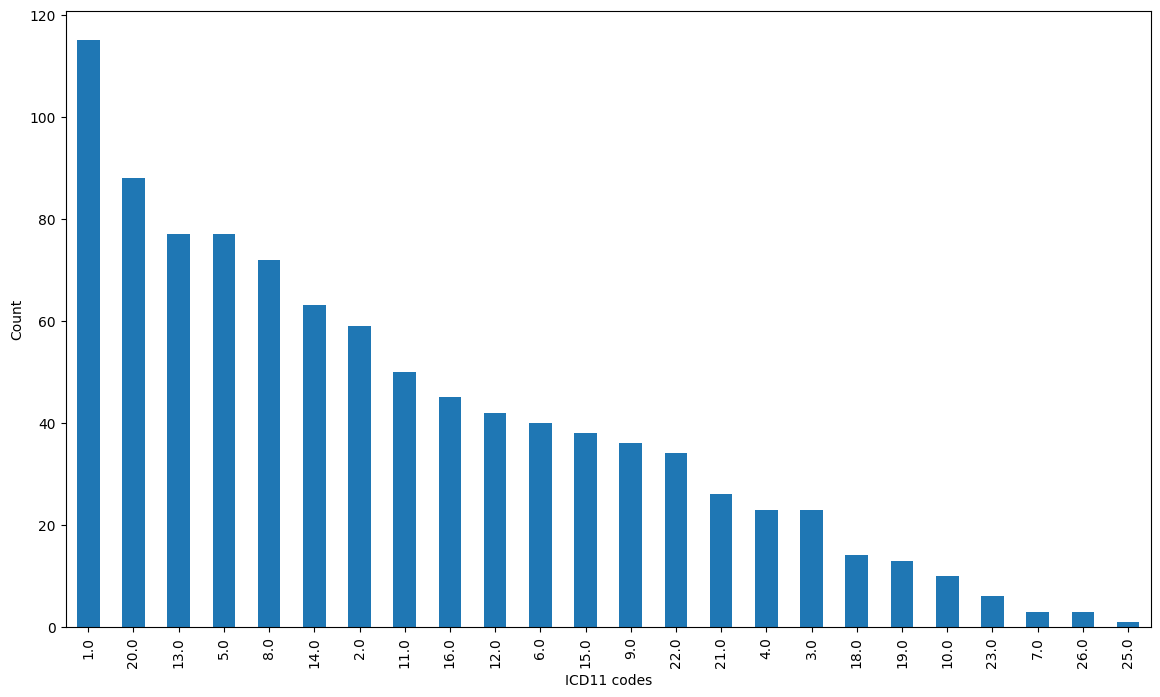

In [19]:
md_terms4acc_pruned=pruneDataset(md_terms_4accuracy)
ax = md_terms4acc_pruned['Label'].value_counts().plot(kind='bar',figsize=(14,8))
ax.set_xlabel("ICD11 codes")
ax.set_ylabel("Count")
#md_terms4acc_pruned.plot.bar()

In [20]:
# Extract data for bertopic
symtomps_as_paragraph_reduced=md_terms4acc_pruned['s_s'].tolist()

## 3. Setting up base BERTopic model

### 3.1 Precalculate embeddings


In [21]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [22]:
embeddings = embedding_model.encode(symtomps_as_paragraph, show_progress_bar=True)
embeddings_reduced = embedding_model.encode(symtomps_as_paragraph_reduced, show_progress_bar=True)

Batches:   0%|          | 0/71 [00:00<?, ?it/s]

Batches:   0%|          | 0/30 [00:00<?, ?it/s]

### 3.2 Setting up bertopic blocks

In [23]:
#!pip install 'umap-learn==0.3.10'
from umap import UMAP
umap_model = UMAP(n_neighbors=20, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [24]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
additional_stopwords=['Signs','signs','Sign', 'sign', 'Symptoms','symptoms','Symptom','symptom','include','affected','people','features','patients','disease','present','common','usually'] #'syndrome', disease, patient, patients
stop_words_mod=list(text.ENGLISH_STOP_WORDS)+additional_stopwords
vectorizer_model = CountVectorizer(stop_words=stop_words_mod, min_df=1, ngram_range=(1, 2))
# vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

### 3.3 DEFINING representation models

In [26]:
#!pip install typing-extensions --upgrade

import openai
import bertopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, OpenAI, PartOfSpeech
#from spacy import parts_of_speech
# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
#pos_model = PartOfSpeech("en_core_web_sm")
# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)

# GPT-3.5
prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: [KEYWORDS]

Based on the information above, extract a short but highly descriptive topic label of at most 5 words. Make sure it is in the following format:
topic: <topic label>
"""
client = openai.OpenAI(api_key="sk-...")
#openai_model = OpenAI(client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True, prompt=prompt)

# All representation models
representation_model = {
    "KeyBERT": keybert_model,
    # "OpenAI": openai_model,  # Uncomment if you will use OpenAI
    "MMR": mmr_model,
    #"POS": pos_model #not working in local computer
}

## 4. Model exploration

### 4.1 Metrics calculation

#### 4.1.1 Topic model quality calculation
Steps:
1. Write docs & topics as octis suggestion
2. Calculate topic diversity
3. eventually apply another topic model to compare values

In [ ]:
'''
#writing corpus.tsv
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
par=symtomps_as_paragraph[0]
#text = "Let's see how it's working."
corpus=[tokenizer.tokenize(par) for par in symtomps_as_paragraph]
w_filenameTSV = 'corpus.tsv'
df_corpus=pd.DataFrame(corpus)
with open(w_filenameTSV,'w') as write_tsv:
    write_tsv.write(df_corpus.to_csv(sep=' ',index=False))
#in corpus open it and delete first row, then everything gets as octis wants

#writing vocab
line=[]
for p in corpus:
  line+=p
print(f"len di linea: {len(line)}")
line=set(line)
print(f"new length with set: {len(line)}")
df=pd.DataFrame(line)
df.to_csv('vocab.txt', sep='\n', index=False)
'''

In [ ]:
# evaluating other models to compare
from octis.dataset.dataset import Dataset
from octis.models.LDA import LDA

# Load a dataset
#dataset = Dataset()
#dataset.load_custom_dataset_from_folder("dataset_folder")

model = LDA(num_topics=25)  # Create model
model_output = model.train_model(dataset) # Train the model
metric = TopicDiversity(topk=10) # Initialize metric
topic_diversity_score = metric.score(model_output) # Compute score of the metric
print(model_output['topics'])
print(f"topic diversity LDA: {topic_diversity_score}")

[['the', 'of', 'and', 'in', 'with', 'to', 'a', 'symptoms', 'or', 'is'], ['of', 'the', 'and', 'to', 'a', 'or', 'in', 'is', 'with', 'as'], ['and', 'of', 'the', 'in', 'symptoms', 'to', 'a', 'may', 'or', 'are'], ['and', 'of', 'the', 'a', 'in', 'with', 'may', 'or', 'to', 'is'], ['and', 'the', 'of', 'in', 'to', 'may', 'with', 'symptoms', 'or', 'can'], ['and', 'of', 'the', 'may', 'symptoms', 'in', 'with', 'or', 'be', 'to'], ['of', 'the', 'or', 'may', 'and', 'in', 'to', 'with', 'be', 'a'], ['the', 'and', 'with', 'of', 'to', 'in', 'or', 'may', 'a', 'as'], ['the', 'of', 'is', 'may', 'pain', 'and', 'in', 'or', 'a', 'to'], ['the', 'of', 'buttock', 'and', 'is', 'Delayed', 'may', 'in', 'pain', 'or'], ['of', 'the', 'and', 'or', 'a', 'in', 'to', 'symptoms', 'with', 'is'], ['of', 'and', 'amnesia', 'anterograde', 'declarative', 'or', 'the', 'a', 'in', 'patients'], ['the', 'of', 'and', 'to', 'in', 'a', 'or', 'is', 'with', 'symptoms'], ['and', 'the', 'of', 'in', 'is', 'to', 'or', 'may', 'a', 'with'], ['an

In [ ]:
from octis.dataset.dataset import Dataset
dataset = Dataset()
dataset.load_custom_dataset_from_folder("/content/Dataset")

In [27]:
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

def calculate_metrics(topic_model,param,value,duration):
  metric_d = TopicDiversity(topk=10)
  #metric_c = Coherence(topk=10)
  metric_c= Coherence(texts=dataset.get_corpus(), measure = 'c_v',topk=10)

  model_output_bertopic={'topics':topic_model.get_topic_info()['Representation'].tolist()}
  diversity = metric_d.score(model_output_bertopic)
  n_topics= len(model_output_bertopic['topics'])
  try:
    coherence= metric_c.score(model_output_bertopic)
  except:
    print("not possible to calculate coherence")
    coherence=0

  print(f"topic diversity bertopic: {diversity}")
  print(f"topic coherence bertopic: {coherence}")
  return [param,value,n_topics,diversity, coherence, duration]

#### Topic Modeling & Accuracy Calculation
- Detection of all documents per topic and mapping of topics & ICD-11 classes
-- this is an interpretation of the topics description and comes from the study of the most representative documents per topic
- Calculation of the classification report

##### FUNCTIONS

In [28]:
def prunefullDataset(df):
  print(f"initial length of dataset: {df.shape[0]}")
  tmp_df=df.dropna()
  print(f"after prune na values: len: {tmp_df.shape[0]}")
  tmp_df=tmp_df[tmp_df['Label']!=-1] #prune -1
  print(f"after prune -1 values of labels: len: {tmp_df.shape[0]}")

  tmp_df=tmp_df[tmp_df['pred']!=-1] #prune -1
  print(f"after prune -1 values of preds (topic -1): len: {tmp_df.shape[0]}")

  tmp_df=tmp_df[tmp_df['Label']!='X'] #prune -1
  tmp_df=tmp_df[tmp_df['Label']!='x'] #prune -1
  tmp_df=tmp_df[tmp_df['Label']!=' X'] #prune -1
  tmp_df=tmp_df[tmp_df['Label']!='X '] #prune -1
  print(f"after prune X values: len: {tmp_df.shape[0]}")
  tmp_df=tmp_df.reset_index()
  return tmp_df

In [29]:
# functions
from sklearn.metrics import accuracy_score, classification_report

def topic_2_ICD11(value,type='ICD',MAX_TOPICS=23,map='hdbscan'):
    '''

    value: topic number to map
    type:   can be 'ICD' or 'descr' in order to get the integer classificatin of ICD or the description of such classification
    map: 'hdbscan' , 'kmeans', 'birch' - each cluster creates different topics --> different maps
    - mapping has been created looking at the topic keywords and most representative docs, to understand correct classification. The latter follows:

    #map for hdbscan
    topic#  ICD11       descr
    -1      NC
    0       14          Diseases of the skin
    1       15          Diseases of the muculoskeletal system or connective tissue
    2       1           Certain infectious or parasitic diseases
    3       9           Diseases of the visual system
    4       20          Developmental anomalies
    5       11          Diseases of the circulatory system/heart failure
    6       3           Diseases of the blood or blood-forming organs
    7       13          Diseases of the digestive system/diseases of small intestine
    8       6a          Mental, behavioural or neurodevelopmental disorders/anxierty or fear related disorders
    9       12          Diseases of the respiratory system
    10      5           Endocrine, nutritional or metabolic diseases
    11      13          Diseases of the digestive system/Diseases of orofacial complex
    12      NC
    13      16          Diseases of the genitourinary system/Female
    14      16a         Diseases of the genitourinary system/disease urinary system
    15      8a          Diseases of the nervous system/cerebro vascular diseases
    16      6b          Mental, behavioural or neurodevelopmental disorders/neurocognitive disorders
    17      18          Pregnancy, childbirth or the puerperium
    18      13          Diseases of the digestive system/disease of livers
    19      8b          Diseases of the nervous system/movement disorders
    20      10          Diseases of the ear or mastoid process
    21      15          Diseases of the musculoskeletal system or connective tissue

    '''
    ICD_class_previous=[14,15,1,9,20,11,3,13,6,12,5,13,-1,16,16,8,6,18,13,8,10,15]
    ICD_class=[14,15,1,11,9,3,20,12,13,6,-1,13,16,16,8,18,5,6,8,13,10,5,-1] # for hdbscan
    #ICD_class=[14,5,13,1,15,3,12,3,8,20,11,2,18,9,21,6,13,1,16,8,18,10,-1]# for KMEans
    #ICD_class=[14,15,8,1,18,13,6,12,3,20,3,11,9,2,13,8,16,5,8,10,1,-1,-1]# for Birch

    ICD_descr=['Diseases of the skin','Diseases of the muculoskeletal system or connective tissue','Certain infectious or parasitic diseases','Diseases of the visual system','Developmental anomalies',\
               'Diseases of the circulatory system/heart failure','Diseases of the blood or blood-forming organs','Diseases of the digestive system/diseases of small intestine','Mental, behavioural or neurodevelopmental disorders/anxierty or fear related disorders',\
               'Diseases of the respiratory system','Endocrine, nutritional or metabolic diseases','Diseases of the digestive system/Diseases of orofacial complex','NC','Diseases of the genitourinary system/Female',\
                'Diseases of the genitourinary system/disease urinary system','Diseases of the nervous system/cerebro vascular diseases','Mental, behavioural or neurodevelopmental disorders/neurocognitive disorders',\
                'Pregnancy, childbirth or the puerperium','Diseases of the digestive system/disease of livers','Diseases of the nervous system/movement disorders','Diseases of the ear or mastoid process','Diseases of the musculoskeletal system or connective tissue']
    result=0
    if value==-1:
        result=-1
    if value>=0 and value <MAX_TOPICS:
        if (type=='ICD'):
            result=ICD_class[value]
        if (type =='descr'):
            result=ICD_descr[value]
    #if result ==0:
    #    result=-2#"classification/description not found!"

    return result
def add_groundtruth(gt_localpos,df):

    xls = pd.ExcelFile(gt_localpos)
    labels_gt=pd.read_excel(xls,'Labels_sheet')['Label']
    temp_list=[]
    for elem in labels_gt:
      if elem in list(range(1,27)):
        temp_list.append(elem)
      else:
        temp_list.append(0)
    labels_df=pd.DataFrame(temp_list,columns=['label'])

    if(labels_df.shape[0]==df.size[0]):
        df_new=pd.concat([df,labels_df],axis=1)#put the column labels at right
    else:
        print("size of labels and df does not match!")
    return df_new

def get_groundtruth(gt_localpos):

    xls = pd.ExcelFile(gt_localpos)
    labels_gt=pd.read_excel(xls,'Labels_sheet')['Label']
    temp_list=[]
    for elem in labels_gt:
      if elem in list(range(1,27)):
        temp_list.append(elem)
      else:
        temp_list.append(-1)
    labels_df=pd.DataFrame(temp_list,columns=['label'])

    return labels_df
def calculate_accuracy(topics,med_terms):
    xls = pd.ExcelFile("progettoMalattia_mod.xlsx")
    labels_gt=pd.read_excel(xls,'Labels_sheet')['Label']
    print(labels_gt.size)
    tmp_df=pd.DataFrame(med_terms,columns=['med_terms']) #to have a label name

    topics_mapped=[topic_2_ICD11(eval) for eval in topics]#map topics to ICD classification
    tp=pd.DataFrame(topics_mapped,columns=['pred'])
    md_terms_4accuracy=pd.concat([tmp_df,pd.DataFrame(labels_gt)],axis=1)
    md_terms_4accuracy=pd.concat([md_terms_4accuracy,tp],axis=1)
    print(md_terms_4accuracy.head())
    print(f"start matrix with shape: {md_terms_4accuracy.shape[0]}")

    final_df=prunefullDataset(md_terms_4accuracy)

    accuracy= accuracy_score(final_df['Label'],final_df['pred'])
    class_report= classification_report(final_df['Label'],final_df['pred'])
    print(f"total accuracy: {accuracy}")
    print(f"classificion report: \n {class_report}")
    return classification_report(final_df['Label'],final_df['pred'],output_dict=True)


##### CALCULATING ACCURACY

In [ ]:
report=calculate_accuracy(topics,md_terms_ss_df['medical_term'].tolist())
acc_hdscan_df = pd.DataFrame(report).transpose()
acc_hdscan_df.to_excel('class_report_Birch.xlsx')

2255
                        med_terms  Label  pred
0           Paracetamol poisoning   22.0     6
1                      Acromegaly    5.0    13
2               Actinic keratosis   14.0    14
3  Congenital adrenal hyperplasia    5.0     3
4        Adrenocortical carcinoma    2.0     3
start matrix with shape: 2255
initial length of dataset: 2255
after prune na values: len: 972
after prune -1 values of labels: len: 958
after prune -1 values of preds (topic -1): len: 953
after prune X values: len: 953
total accuracy: 0.49422875131164745
classificion report: 
               precision    recall  f1-score   support

         1.0       0.72      0.55      0.62       115
         2.0       0.23      0.12      0.16        58
         3.0       0.23      0.91      0.36        23
         4.0       0.00      0.00      0.00        22
         5.0       0.45      0.12      0.19        77
         6.0       0.61      0.70      0.65        40
         7.0       0.00      0.00      0.00         3
  

### Tests:
HDBSCAN - choose reasonable number of topics
- Found 22 topics - logics: minimum docs per topic > 20
- from topic visualization 6 groups seems to be the optimal choice
- high number of unclassified documents

Vectorizer tests
- mindf=1 : changes just group 12: war--- to veteran.sle, war, gulf. # of topics are the same. SLe is the most representative doc, it's autoimmune disease


In [30]:
from bertopic import BERTopic
from sklearn.cluster import KMeans,Birch
from sklearn.decomposition import PCA,TruncatedSVD
import time

#cluster_model=[HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', prediction_data=True),\
#               Birch(branching_factor = 50, n_clusters = 22, threshold = 0.5),\
#               KMeans(n_clusters=22)]
cluster_model=[HDBSCAN(min_cluster_size=20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)]
cluster_names=['hdbscan','Birch','Kmeans']

In [31]:
#put here the block to study in order to understand behaviors
#list_to_check=range(2,23,2)#kmeans/birch
#list_to_check=range(20,160,10)#hdbscan - birch branching factor
#list_to_check=range(2,10,1)#hdbscan - birch branching factor

#list_to_check=range(5,10,1)
#list_to_check=[(1,2),(1,3),(2,3)]#for ngram in vectorizer
#list_to_check=range(2,10,1)#for PCA
list_to_check=range(2,3,2)
params=[]
results=[] # just add the other results down there
# list_to_check=range(140,160,10)
i=-1
for cluster in cluster_model:
  i+=1
  for size in list_to_check:#reversed(list_to_check): #list_to_check:#for countvectorizer
    #hdbscan_model = HDBSCAN(min_cluster_size=7, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
    #vectorizer_model = CountVectorizer(stop_words=stop_words_mod, min_df=1, ngram_range=size)
    #hdbscan_model= KMeans(n_clusters=23)
    #hdbscan_model= Birch(branching_factor = 50, n_clusters = 23, threshold = 0.5)#1.5: con threshold, basse trova più cluster 0.1 per pca e 0.5 per umap
    #hdbscan_model=cluster
    #umap=PCA(n_components=size,random_state=42)
    start=time.time()
    topic_model = BERTopic(

    # Pipeline models
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    # Hyperparameters
    top_n_words=10,
    verbose=True
  )
    a=topic_model.get_params()
    print(f"hdbscan model: {a['hdbscan_model']}")
    topics, probs = topic_model.fit_transform(symtomps_as_paragraph, embeddings)
    #topics, probs = topic_model.fit_transform(symtomps_as_paragraph, embeddings)

    #new_topics = topic_model.reduce_outliers(symtomps_as_paragraph, topics, strategy="embeddings", embeddings=embeddings)
    #topic_model.update_topics(symtomps_as_paragraph, topics=new_topics)
    end=time.time()
    duration=end-start
    #results.append(calculate_metrics(topic_model,cluster_names[i],size,duration))
    #results.append(calculate_metrics(topic_model,'PCA kmeans(22) - n_components',size,duration))
    #results.append(calculate_metrics(topic_model,'hdbscan min_cluster_size',size))
    #results.append(calculate_metrics(topic_model,'kmeans: n_clusters',size))


    print(f"model {cluster_names[i]} - size {size} analyzed")
    a=topic_model.get_topic_freq()
    # a['index_old']=a.index
    b=topic_model.get_topic_info()['Name']
    a.reset_index(inplace=True)
    b.reset_index(drop=True)
    a=pd.concat([a,b],axis=1)
    params.append(a)
    topic_model.get_topic_info()

2024-02-25 19:00:41,710 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


hdbscan model: HDBSCAN(min_cluster_size=20, prediction_data=True)


2024-02-25 19:01:10,657 - BERTopic - Dimensionality - Completed ✓
2024-02-25 19:01:10,659 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-25 19:01:10,754 - BERTopic - Cluster - Completed ✓
2024-02-25 19:01:10,763 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-25 19:01:53,682 - BERTopic - Representation - Completed ✓


model hdbscan - size 2 analyzed


In [ ]:
#res=pd.read_excel('comparison_clustermodels.xlsx')
topic_model.get_params()
#res['topics']
#results=results[9:]
#len(results)
#filter.head(9)
#res=pd.DataFrame(results,columns=['cluster model','Value','topics','diversity','coherence','wall time'])#,'coherence_npmi'])
#filter=res[(res['reduction model - parameter']!='PCA (5) hdbscan - min_cluster_size')]# and (res['reduction model - parameter']!='PCA hdbscan (7) - n_components')]
#filter=filter[(filter['reduction model - parameter']!='PCA hdbscan (7) - n_components')]
#res.head()

<Axes: xlabel='Value', ylabel='wall time'>

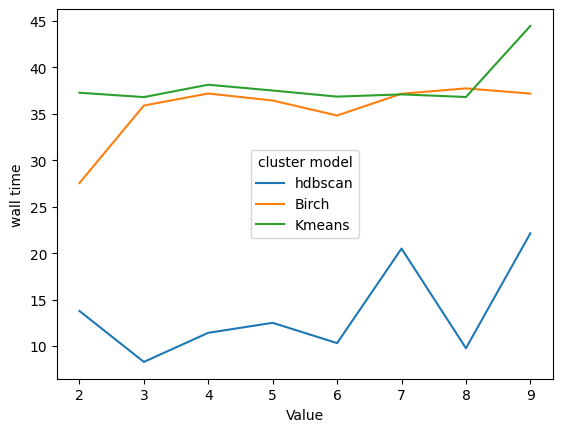

In [ ]:
res.to_excel('comparison_reduce_models_PCA.xlsx')
#print(f"diversity avg {filter['diversity'].mean()}")
#print(f"coherence avg {filter['coherence'].mean()}")
#print(f"wall time avg {filter['wall time'].mean()}")

(0.0, 1.0)

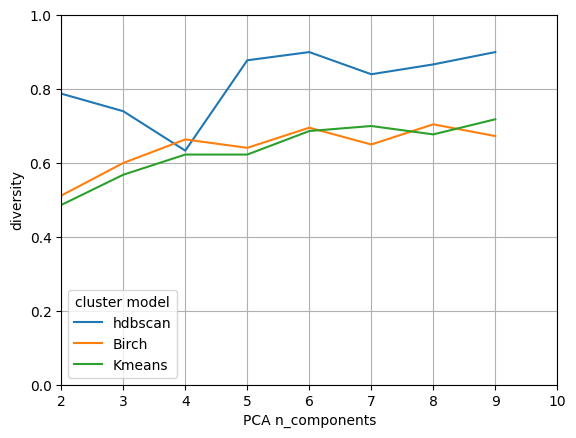

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns
res=pd.DataFrame(results,columns=['cluster model','Value','topics','diversity','coherence','wall time'])#,'coherence_npmi'])
fig, ax= plt.subplots()
sns.lineplot(x="Value", y="diversity",hue="cluster model",data=res, ax=ax)
#res.to_excel('comparison_clustermodels.xlsx')#
#res_pivot=res.pivot(index='topics',columns='Parameter',values=['diversity','coherence'])
#res_pivot.plot()
#res.plot(x='topics',y=['diversity','coherence'],ax=ax)
ax.grid()
ax.set_xlabel('PCA n_components')
#ax.set_ylabel('wall time (s)')
ax.set_xlim([2,10])
ax.set_ylim([0,1])


In [32]:
#a.to_excel('birch_topics_frequency_23.xlsx')
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,764,-1_pain_muscle_cases_syndrome,"[pain, muscle, cases, syndrome, blood, loss, s...","[diagnosis, neurological, disorders, syndrome,...","[pain, muscle, cases, syndrome, blood, loss, s...",[Findings are due to brain stem and lower cran...
1,0,173,0_skin_lesions_hair_red,"[skin, lesions, hair, red, rash, areas, area, ...","[skin lesions, dermatitis, contact dermatitis,...","[skin, lesions, hair, red, rash, areas, area, ...","[Skin lesions. Initially red to pink, flat spo..."
2,1,138,1_pain_joint_arthritis_spinal,"[pain, joint, arthritis, spinal, knee, shoulde...","[pain swelling, arthritis, numbness, neuropath...","[pain, joint, arthritis, spinal, knee, shoulde...",[Degenerative disc disease can result in lower...
3,2,114,2_fever_infection_days_infected,"[fever, infection, days, infected, pain, sever...","[fever, infection, infections, illness, enceph...","[fever, infection, days, infected, pain, sever...",[Around 85% of people infected with Chikunguny...
4,3,95,3_heart_ventricular_left_chest,"[heart, ventricular, left, chest, cardiac, ang...","[heart failure, chest pain, tachycardia, myoca...","[heart, ventricular, left, chest, cardiac, ang...",[The cause of HCM is variable. Many people are...
5,4,92,4_eye_vision_visual_corneal,"[eye, vision, visual, corneal, loss, eyes, cor...","[eye strain, vision loss, blurred vision, loss...","[eye, vision, visual, corneal, loss, eyes, cor...",[The most common sign at presentation is leuko...
6,5,83,5_blood_anemia_cells_bleeding,"[blood, anemia, cells, bleeding, iron, count, ...","[anemia, leukemia, hemochromatosis, iron defic...","[blood, anemia, cells, bleeding, iron, count, ...",[This type of leukemia is characterized by: Mo...
7,6,82,6_syndrome_abnormalities_bones_cleft,"[syndrome, abnormalities, bones, cleft, childr...","[abnormalities, syndrome, malformations, cleft...","[syndrome, abnormalities, bones, cleft, childr...",[Children born with Edwards syndrome may have ...
8,7,80,7_cough_chest_lung_breath,"[cough, chest, lung, breath, breathing, sputum...","[difficulty breathing, bronchitis, breathlessn...","[cough, chest, lung, breath, breathing, sputum...",[The majority of patients who are diagnosed wi...
9,8,72,8_abdominal_pain_bowel_abdominal pain,"[abdominal, pain, bowel, abdominal pain, abdom...","[abdominal bloating, abdominal pain, pain diar...","[abdominal, pain, bowel, abdominal pain, abdom...",[Signs and symptoms of a peptic ulcer can incl...


In [33]:
topic_model.get_representative_docs(15)

['Symptoms of a rupture may be initially quite subtle. An old cesarean scar may undergo dehiscence; with further labor the woman may experience abdominal pain and vaginal bleeding, though these signs are difficult to distinguish from normal labor. Often a deterioration of the fetal heart rate is a leading sign, but the cardinal sign of uterine rupture is loss of fetal station on manual vaginal exam. Intra-abdominal bleeding can lead to hypovolemic shock and death.   Although the associated maternal mortality is now less than one percent, the fetal mortality rate is between two and six percent when rupture occurs in the hospital.. In pregnancy uterine rupture may cause a viable abdominal pregnancy. This is what accounts for most abdominal pregnancy births.. ',
 'Although many pregnant women with high blood pressure have healthy babies without serious problems, high blood pressure can be dangerous for both the mother and baby. Women with pre-existing, or chronic, high blood pressure are 

### saving model

In [ ]:
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model.save("./model_dir/hdbscan", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

### Creating plots

In [34]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns

# fig,ax= plt.subplots()
# x=range(10,150,10)


# columns=['min_cluster_size','-1','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','18','19','20','21','22','23','24','25']
df_plot=pd.DataFrame()#columns=columns)
# df_plot.columns=columns
# df_plot['min_cluster_size']=list(range(10,150,10))
# df_plot.head()
lista=[]
i=10
for df in params:
    # y=df['Count']
    lista.append(df['Count'])
# lista.pop(-1)
df_plot=pd.DataFrame(lista)
df_plot.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Count,764,173,138,114,95,92,83,82,80,72,...,51,45,41,36,35,30,29,23,21,20


In [ ]:

# df_plot.reset_index(inplace=True)
df_plot.columns = range(df_plot.columns.size)
# df_plot=df_plot.drop(columns=['index'])
#columns=list(range(-1,21)) #ok for hdbscan with outliers
columns=list(range(len(params[-1]))) #len(params[-1])

df_plot.columns = columns
#df_plot.index = list(reversed(range(2,23,2)))
df_plot['min_cluster_size']=list(reversed(range(10,150,10)))
df_plot.head()


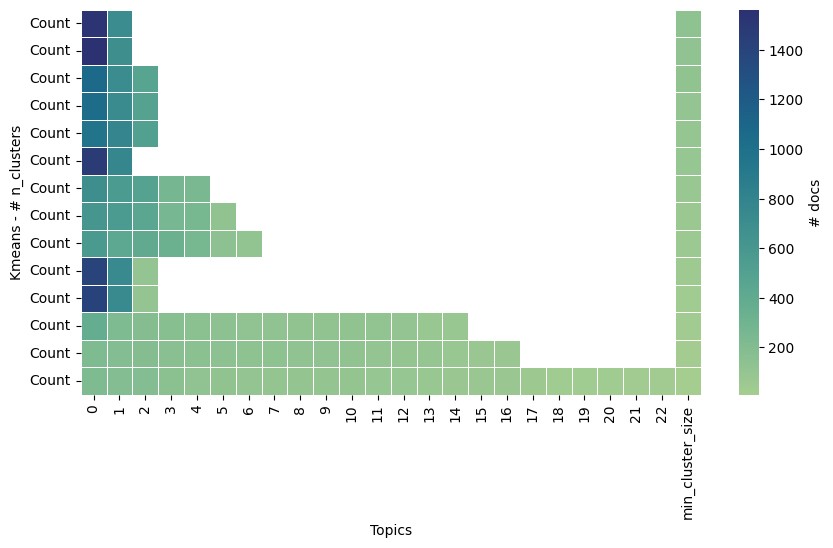

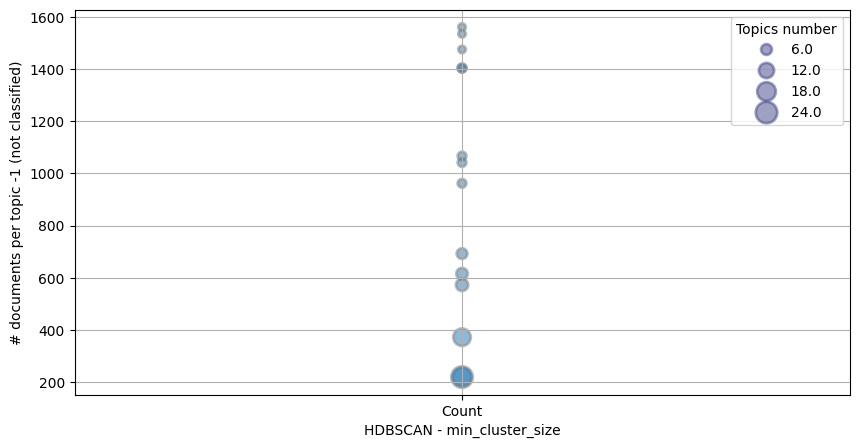

In [ ]:
fig, ax=plt.subplots(figsize=(10, 5))
# ax.set_xlabel('Topics')
ax_sns=sns.heatmap(df_plot,annot=False,linewidth=.5,cmap="crest",ax=ax,cbar_kws={'label': '# docs'})#,vmin=10, vmax=600)
ax.set_xlabel('Topics')
ax.set_ylabel('Kmeans - # n_clusters')

fig2, ax2=plt.subplots(figsize=(10, 5))
size=[row.count()*10 for row in df_plot.iloc]
scatter=ax2.scatter(df_plot.index,df_plot[0],s=size,cmap="Blues", alpha=0.5, edgecolors="grey", linewidth=2)#df_plot[-1] per hdbscan
ax2.invert_xaxis()
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax2.legend(handles, labels, loc="upper right", title="Sizes")
kw = dict(prop="sizes", num=4, color=scatter.cmap(0.2), fmt="{x}",
          func=lambda s: s/10)
legend2 = ax2.legend(*scatter.legend_elements(**kw),
                    loc="upper right", title="Topics number")
ax2.set_xlabel('HDBSCAN - min_cluster_size')
ax2.set_ylabel('# documents per topic -1 (not classified)')
ax2.grid()


- chosen min_cluster_size = 20 --> groups are already little

In [36]:
print(params[0].head(20)['Name'].to_string(index=False))
# topic_model.get_topic(1, full=True)

             -1_pain_muscle_cases_syndrome
                   0_skin_lesions_hair_red
             1_pain_joint_arthritis_spinal
           2_fever_infection_days_infected
            3_heart_ventricular_left_chest
               4_eye_vision_visual_corneal
             5_blood_anemia_cells_bleeding
      6_syndrome_abnormalities_bones_cleft
                 7_cough_chest_lung_breath
     8_abdominal_pain_bowel_abdominal pain
       9_disorder_hallucinations_self_mood
                  10_veterans_sle_war_gulf
            11_tooth_mucosa_lesions_tongue
             12_kidney_urine_renal_urinary
               13_women_pain_pelvic_levels
     14_brain_headache_pressure_hemorrhage
         15_pregnancy_uterine_women_uterus
               16_calcium_blood_low_muscle
17_movements_dementia_cerebellar_cognitive
       18_seizures_seizure_tonic_myoclonic


### Model visualization: topics and documents

In [37]:
topic_model.visualize_topics()

In [38]:
topic_distr, _ = topic_model.approximate_distribution(symtomps_as_paragraph, window=8, stride=4)

100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


In [39]:
disease_id = 10
print(symtomps_as_paragraph[disease_id])

Classic signs and symptoms of anaplasmosis will not occur until 3–6 weeks after infection. The most common symptoms of anaplasmosis include fever, a decreased number of white blood cells, platelets in the bloodstream, and abnormally elevated levels of liver enzymes. The erythema chronicum migrans rash may be seen with anaplasmosis as it is co-transmitted in 10% of Lyme disease cases.. Anemia may be severe and result in cardiovascular changes such as an increase in heart rate. Blood in the urine may occur due to the lysis of red blood cells. General systemic signs include diarrhea, anorexia, and weight loss. Infected animals may develop a jaundiced look which then turns into paleness around the eyes, muzzle, lips, and teats of the cattle.All cattle are susceptible to infection by Anaplasma marginale, but the severity worsens with age increase. Older cattle tend to exhibit the most severe clinical symptoms; cattle aged 1–3 may also show severe symptoms but are able to recover easier.. 


In [40]:
# Visualize the topic-document distribution for a single document
topic_model.visualize_distribution(topic_distr[disease_id])

In [41]:
# Calculate the topic distributions on a token-level
topic_distr, topic_token_distr = topic_model.approximate_distribution(symtomps_as_paragraph[disease_id], calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(symtomps_as_paragraph[disease_id], topic_token_distr[0])
df

100%|██████████| 1/1 [00:00<00:00, 80.88it/s]


,Classic,signs,and,symptoms,of,anaplasmosis,will,not,occur,until,weeks,after,infection,The,most,common,symptoms,of,anaplasmosis,include,fever,decreased,number,of,white,blood,cells,platelets,in,the,bloodstream,and,abnormally,elevated,levels,of,liver,enzymes,The,erythema,chronicum,migrans,rash,may,be,seen,with,anaplasmosis,as,it,is,co,transmitted,in,10,of,Lyme,disease,cases,Anemia,may,be,severe,and,result,in,cardiovascular,changes,such,as,an,increase,in,heart,rate,Blood,in,the,urine,may,occur,due,to,the,lysis,of,red,blood,cells,General,systemic,signs,include,diarrhea,anorexia,and,weight,loss,Infected,animals,may,develop,jaundiced,look,which,then,turns,into,paleness,around,the,eyes,muzzle,lips,and,teats,of,the,cattle,All,cattle,are,susceptible,to,infection,by,Anaplasma,marginale,but,the,severity,worsens,with,age,increase,Older,cattle,tend,to,exhibit,the,most,severe,clinical,symptoms,cattle,aged,may,also,show,severe,symptoms,but,are,able,to,recover,easier
0_skin_lesions_hair_red,0.000,0.000,0.000,0.000,0.000,0.000,0.103,0.103,0.103,0.103,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.103,0.205,0.205,0.205,0.103,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2_fever_infection_days_infected,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.140,0.280,0.496,0.712,0.572,0.432,0.216,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.113,0.113,0.113,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.113,0.226,0.339,0.453,0.339,0.226,0.113,0.000,0.000,0.000,0.000
3_heart_ventricular_left_chest,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0.290,0.465,0.640,0.503,0.351,0.175,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5_blood_anemia_cells_bleeding,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0

In [42]:
topic_model.visualize_hierarchy()

In [45]:
# Documents
from umap import UMAP
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
# Visualize the documents in 2-dimensional space and show the titles on hover instead of the abstracts
# NOTE: You can hide the hover with `hide_document_hover=True` which is especially helpful if you have a large dataset
labels=md_terms_ss_df['medical_term'].to_list()
topic_model.visualize_documents(labels, reduced_embeddings=reduced_embeddings)